Beacuse interpretaility is important, I'll start with a decission tree, then create a Random Forest Classifier. Compare the results, and find tune the ones that produces the best results.

-- create a goal for this project that ids the audience, summarize steps 

In [295]:
#!pip3 install pandas

In [296]:
import pandas as pd

In [297]:
df = pd.read_csv('kickstarter_corpus_annotated.csv',encoding = 'latin1')

## Data Exploration##

We'll start with some data exploration to understand what data we have and the quality of it. The goal at this point is to gain an underatanding of some basics stats, and to understand any fields that might need cleaning, or that could require extra processing steps before we train a model. Back in the day, I would have used an excel pivot table with some calculated values. These days, I use pandas instead. 

In [298]:
df.head()

author  backers  \
0                Christian Berry       12   
1               Jonathan Vaughan      180   
2        T H E I N S T I T U T E        0   
3                    James Tracy       18   
4  Joshua Smith & Sean Watterson      215   

                                                                                                                          blurb  \
0                                                        In a world consumed by Ooze<br>a beacon of hope towers above the rest.   
1                                              A cop must battle a ruthless villain intent on melting the entire plastic world.   
2  Come journey with SixHandsMouth and surf the sky on the wings of sound, cutting through the typical, arriving at phenomenal.   
3                                       Help a lover of creative T-shirts get one out into the world! THE MASTER WOULD APPROVE!   
4     Ensemble HD, a group of Cleveland Orchestra musicians & friends, is recording a live album at the Happy Dog on Dec 4 & 5!   

       category                   end_date  \
0         Games  2014-11-04T00:00:00-05:00   
1  Film & Video  2013-06-26T14:40:32-04:00   
2         Music  2014-10-14T15:35:58-04:00   
3        Crafts  2014-08-31T21:00:00-04:00   
4         Music  2012-12-15T00:00:00-05:00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 full_text  \
0  Oozem Game Coverage:<br>A retro RPG with a twist. A mysterious ooze has been set looze and has invaded a tiny town. With each passing minute, the ooze grows stronger, more powerful. Taking down HeroÌÎ_ÌÎ_Ì´Ìös and adding them to its collection of minions, and like drones will seek out and destroy anything in their path. Preparing it for Ooze consumption.  You take the role of Toby, an unlikely hero. With a wide array of skills, skills he has learnt through a long gaming career, he must battle wave after wave of zombies...to reach the core and find out who set the Ooze loose.Drawing inspira...   
1  Melting Point is an epic 30-minute Brickfilm, which is a stop-motion animated film created primarily with LEGO bricks. The story follows a cop, Tony, as he tries to protect the city from a ruthless villain intent on melting the entire plastic world. ItÌÎ_ÌÎ_Ì´Ìös an action movie with humor, epic set pieces, and intimate character drama. I've been working on the script for over a year to ensure it's as good as possible.<br>Pre-production for this film has been ongoing for the last several months.Ì´Ì_ÌÎ_I'veÌ´Ì_ÌÎ_completed storyboarding the entire film and voice recording. I assembled an am...   
2  We are raising funds to complete our tour, finish-distribute our second and most grand CD/album and finance the video shoot of our latest single and it is only through the magic of your support that this can happen. This is special project because we seek to honor old blues greats while keeping to our contemporary strengths of indie rock, hip hop and jazz. As a donor you won't be disappointed and as a music enthusiast you'll be fulfilled. Ì´Ì_ÌÎ_We have been ranked thanks to folks like you, number one (1) on Reverbnation.com for eighteen (18) months and counting, lets keep the momentum.<br...   
3  MANOS: THE HANDS OF FATE is one of the most notorious bad movies of all time, and became famous after being riffed on the cult TV show Mystery Science Theater 3000 (MST3K). One of the most rediculous details in the movie was The Master's "hand robe" which was esse

A majority of our columns seem to contain continous values representing counts the number of times a given part of speak was present in some text decribing the kickstarter project. We also a few columns containing long strings of text, some of which have html markers. There is also a high cardinality `location` column, and a comparatively low cardinality column providing information about the campaign `category`. We have the campaign `end_date` and who created it (which we might want to extrapolate into a person versus a group), but not the campaign duration. And finally, we have the `funded` column, which will be our dependent/ target variable. 

In [299]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3087 entries, 0 to 3086
Data columns (total 68 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   author                                                      3087 non-null   object 
 1   backers                                                     3087 non-null   int64  
 2   blurb                                                       3087 non-null   object 
 3   category                                                    3087 non-null   object 
 4   end_date                                                    3087 non-null   object 
 5   full_text                                                   3074 non-null   object 
 6   goal                                                        3087 non-null   int64  
 7   location                                                    3087 non-null   object 
 8 

In [300]:
# set the max columns to none
pd.set_option('display.max_columns', None)
df.describe()

backers          goal       pledged  blurb_adjective_count  \
count   3087.000000  3.087000e+03  3.087000e+03            3087.000000   
mean     105.932297  6.750107e+04  8.711104e+03               1.704891   
std      608.429011  1.858329e+06  5.609278e+04               1.324792   
min        0.000000  1.000000e+00  0.000000e+00               0.000000   
25%        1.000000  2.000000e+03  2.100000e+01               1.000000   
50%       11.000000  6.000000e+03  5.560000e+02               2.000000   
75%       56.000000  1.850000e+04  3.922000e+03               2.000000   
max    17713.000000  1.000000e+08  1.505367e+06               7.000000   

       blurb_bullets_prop  blurb_caps_count  blurb_content_word_count  \
count         3087.000000       3087.000000               3087.000000   
mean             0.000500          0.125364                  8.220603   
std              0.019551          0.726430                  3.014051   
min              0.000000          0.000000                  0.000000   
25%              0.000000          0.000000                  6.000000   
50%              0.000000          0.000000                  8.000000   
75%              0.000000          0.000000                 10.000000   
max              1.000000         13.000000                 17.000000   

       blurb_exclamation_points_count  blurb_first_person_count  \
count                     3087.000000               3087.000000   
mean                         0.326207                  0.496275   
std                          0.652655                  0.887683   
min                          0.000000                  0.000000   
25%                          0.000000                  0.000000   
50%                          0.000000                  0.000000   
75%                          1.000000                  1.000000   
max                          6.000000                  5.000000   

       blurb_lexical_redundancy  blurb_normalized_adjective_count  \
count               3087.000000                       3087.000000   
mean                   0.271785                          0.091813   
std                    0.615466                          0.073987   
min                    0.000000                          0.000000   
25%                    0.000000                          0.043478   
50%                    0.000000                          0.083333   
75%                    0.000000                          0.133333   
max                    6.000000                          0.444444   

       blurb_normalized_caps_count  blurb_normalized_content_word_count  \
count                  3087.000000                          3087.000000   
mean                      0.007487                             0.429412   
std                       0.045544                             0.134049   
min                       0.000000                             0.000000   
25%                       0.000000                             0.350000   
50%                       0.000000                             0.434783   
75%                       0.000000                             0.520000   
max                       0.857143                             1.000000   

       blurb_normalized_exclamation_points_count  \
count                                3087.000000   
mean                                    0.018083   
std                                     0.041427   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.035714   
max                                     0.750000   

       blurb_normalized_first_person_count  blurb_normalized_noun_count  \
count                          3087.000000                  3087.000000   
mean                              0.024032                     0.193820   
std                               0.042128                     0.104076   
min             

From the information that pandas provided about the dataframe, it looks like only 'full_text_active_to_passive' is missing values. I'll keep this in mind as I begin creating the base model. If this field is predictive enough, I may see if I can define suitable placeholder values. 

On the topic of predictiveness, all these columns are a bit much to explore. In my original kickstarter project I created lots and lots of cross tables, visualizations, played around with different categorical groupings HOPING that something would stand out. I think I literally spent ~30 hours digging into the data, only to select like 5 visuals for the presentation of my findings. 

Even when I first started playing around with predictive modeling I would spend hours doing data exploration as a first step, then train a BUNCH of different models to see which worked best, pick the top performers, fine tune them, mess around with weight, and finally select one to really focus on. To be honest, I still do this sometimes... 

However this time around, before I do any additional cleaning or exploration, I'm going to see if I can train a random forest model to help me determine which columns to focus on, and which one's I might consider dropping. I like random forest for this step because its super easy to interpret. 

## Prepping Data Decission Trees

I want to build a decission tree learner, and I want to use Fastai's `TabularPandas` wrapper class. I'll need to do some minimal data preparation. This will include: 
- Converting the `end_date` column to a date part so that we know if there's anything special about the date
- Redefine our categorical columns in such a way that they can be understood by sklearn. 
- Handle missing values
- identify continous versus categorical data columns

cont_cat_split

The fastai library will be helpful here and in a few instances down the road. 

In [301]:
#Install PyTorch and Fastai libraries 
#!pip3 install torch torchvision torchaudio
#!pip3 install fastai

In [302]:
from fastai.tabular.all import *

I'll start by converting the `end_date` column to a date part so that we know if there's anything special about the date. To do this I'll use fastai's add_datepart __ to automatically generate new columns. 

I'll first need to convert the provided date into something that can be used. I was tempted to do some more complicated date `fromiso` date conversions, but decided to keep it simple and start with a simple splice to see if I could get real dates. And it worked! #KISS  

In [303]:
# # do a simple splice
# df['end_date'] = df['end_date'].str.split('T').str[0]

# #use fastai's method to convert to a date 
# make_date(df, 'end_date')

# #Create dateparts
# df = add_datepart(df, 'end_date')
# df

df = df.drop('end_date', axis=1)

Fastai also has some `TabularProc` that we can use to transform and pre-process our data. 

- For now, I'm going to use `Fillmissing` to handle the 117 missing values in the `full_text_active_to_passive`. I feel pretty confident that since this is such a small amout of missing data that I'll still be able to determine if the column is important with the filled in values.  

- I'm also going to use `Categorify` which doesnt change the values in our dataframe, but instead stores the categories in a seperate object that our decission tree can use. 

I'm also tempted to immediately one-hot endcode my categorical variables at this point, but it's not needed for a decission tree.  

Instead, my next step is to identify continous versus categorical data columns, which I can do easily using Fastai's `cont_cat_split` class. 

#https://docs.fast.ai/tabular.core.html

In [304]:
dep_var = 'funded'
processors = [Categorify, FillMissing]
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

#print(f'cat columns: {cat}')


Next I'll instantiate a `TabularPandas`, passing in my processors, column type details, and some information about how I want my data split in terms of what should be used for training, validation and testing later on. 

In [732]:
#!pip3 install fast_ml
# !pip3 install seaborn

from fast_ml.model_development import train_valid_test_split


#Split the data
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = dep_var, 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)


#`TabularPandas` needs a list of indexes for training and testing passed as it split parameter
splits = (X_train.index.tolist(),X_valid.index.tolist())

#Instantiate a  `TabularPandas` object  

tab = TabularPandas(df, processors, cat, cont, y_names=dep_var, splits=splits)
len(tab.train),len(tab.valid)


(2469, 309)

In [733]:
len(X_valid)

309

From this, I can tell that aroud 310 rows of data have been excluded from my training and validation, this practice will help me prevent overfitting should I stack models down the road. Just to make sure the categorization transform produced numeric values, I'll check the `items` within my dataset that will be used in the model. 

#to_do: understand this more. 

In [306]:
tab.items.head(3)

author  backers  blurb  category  full_text  goal  location  \
1990    1060       20   1759         1       2672   290       146   
1914     657      101    215         7        507  8000        88   
1442     251      176   2608         7       2389  7000       706   

          pledged  title  funded  blurb_adjective_count  blurb_bullets_prop  \
1990   639.000000    510       1                      1                 0.0   
1914  8173.000000     78       1                      2                 0.0   
1442  8648.370117    348       1                      3                 0.0   

      blurb_caps_count  blurb_content_word_count  \
1990                 0                        11   
1914                 0                        10   
1442                 0                        14   

      blurb_exclamation_points_count  blurb_first_person_count  \
1990                               2                         1   
1914                               0                         0   
1442                               0                         0   

      blurb_lexical_redundancy  blurb_normalized_adjective_count  \
1990                         0                          0.040000   
1914                         0                          0.095238   
1442                         1                          0.120000   

      blurb_normalized_caps_count  blurb_normalized_content_word_count  \
1990                          0.0                              0.44000   
1914                          0.0                              0.47619   
1442                          0.0                              0.56000   

      blurb_normalized_exclamation_points_count  \
1990                                       0.08   
1914                                       0.00   
1442                                       0.00   

      blurb_normalized_first_person_count  blurb_normalized_noun_count  \
1990                                 0.04                     0.240000   
1914                                 0.00                     0.285714   
1442                                 0.00                     0.320000   

      blurb_normalized_second_person_count  blurb_normalized_stopwords  \
1990                                  0.08                    0.240000   
1914                                  0.00                    0.285714   
1442                                  0.04                    0.400000   

      blurb_normalized_verb_count  blurb_noun_count  \
1990                     0.160000                 6   
1914                     0.095238                 6   
1442                     0.120000                 8   

      blurb_question_mark_count  \
1990                          0   
1914                          0   
1442                          0   

      blurb_ratio_2nd_person_pronouns_to_1st_person_pronouns  \
1990                                                     2.0   
1914                                                     0.0   
1442                                                     1.0   

      blurb_repeated_adjective_count  blurb_repeated_phrases_count  \
1990                               0                             0   
1914                               0                             0   
1442                               1                             0   

      blurb_repeated_word_count  blurb_second_person_count  \
1990                          0                          2   
1914                          0                          0   
1442                          1                          1   

      blurb_sentence_count  blurb_stopwords  blurb_verb_count  \
1990                     3                6                 4   
1914                     1                6                 2   
1442                     2               10                 3   

      blurb_word_count  blurb_words_per_sentence  full_text_active_to_passive  \
1990                25                  8.333333                         14.0 

Now is a good time to save my `TabularPandas` object, so that I can save time in later sessions. 

In [307]:
from datetime import datetime
import os

path = os.getcwd()
dt = datetime.now().strftime("%Y_%m_%d_%H:%M:%S")

filepath = os.path.join(path, "tabularpandas/", f'tabularpandas_{dt}.pkl')
save_pickle(filepath,tab)

#to load save file
#new = load_pickle(filepath)


## Training the Decission Tree
Next, we access the transformed and processed values for our X and y training data from the `TabularPandas` object to begin training our sklearn decission tree. 

In [308]:
#! pip3 install sklearn

In [309]:
from sklearn.tree import DecisionTreeClassifier

In [310]:
X_train_tab,y_train_tab = tab.train.xs,tab.train.y
X_valid_tab,y_valid_tab = tab.valid.xs,tab.valid.y

Next I'll instantiate a Decision Tree Classifier object, fit it to my data and compare scores for my training and validation sets. Because I'm only really concerned with feature importance at this point, I wont set a value for max_depth. I will however, establist `entropy` as function to measure the quality of a split. I could use `gini` or `log_loss` as well. I wont be surprised if the training score is 1.0, I've definitly overfit my model, but again, that's not the focus as of right now. 

In [311]:
# Instatiate and instance of sklearns decission tree model and fit our training data
m = DecisionTreeClassifier()
m.fit(X_train_tab, y_train_tab)

DecisionTreeClassifier()

In [312]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [313]:
#View validation set accuracy score
y_pred_valid = m.predict(X_valid_tab)
print(f'model accuracy score - validation set: {accuracy_score(y_valid_tab, y_pred_valid)}')
print(f'number of leaves: {m.get_n_leaves()}, number of data points: {len(X_valid_tab)}')

# print(f'training score: {m.score(X_train_tab, y_train_tab)}, validation score {m.score(X_valid_tab,y_valid_tab)}')

model accuracy score - validation set: 0.941747572815534
number of leaves: 89, number of data points: 309


From the score, we can see that our model's mean accuracy on the validation set was 93%, which is pretty high. Having passed no leave quality requirements to our model, it is almost guarenteed that our model is overfit. As the number of lead nodes created approaches the number of data points included, our model becomes more and more overfit. 


In [314]:
#View classification report
print(classification_report(y_valid_tab, y_pred_valid))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       225
           1       0.90      0.88      0.89        84

    accuracy                           0.94       309
   macro avg       0.93      0.92      0.93       309
weighted avg       0.94      0.94      0.94       309



From the classification report, we can see that our model is a bit better at predicting `not funded` campaigns, which makes sense when considering the fact that 224 campaigns in the validation set were not funded, versus 85 which were funded. 

- Percision: Our model did a better job of voiding misclassifications for the unfunded group. 
- Recall: It also more frequently missed funded campaigns because it was being too careful.  

Now is a good time to actual look at how our training data was branched in the decission tree. The dtreeviz package beautifies and augments that standard output that we would get using sklearn. 

In [315]:
confusion_matrix(y_valid_tab, y_pred_valid)

array([[217,   8],
       [ 10,  74]])

In [316]:
# ! pip3 install dtreeviz
# ! pip3 install graphviz

In [317]:
from dtreeviz.trees import *

In [318]:
viz = dtreeviz(m, 
               x_data=X_train_tab,
               y_data=y_train_tab,
               target_name='funded',
               feature_names=m.feature_names_in_, 
               scale=1,
               label_fontsize=10,
               class_names=["True", "False"],
#                fancy=False,
               title="Decision Tree - Kickstarter data set")
viz

Let's take a look at feature importance. 

<AxesSubplot:ylabel='cols'>

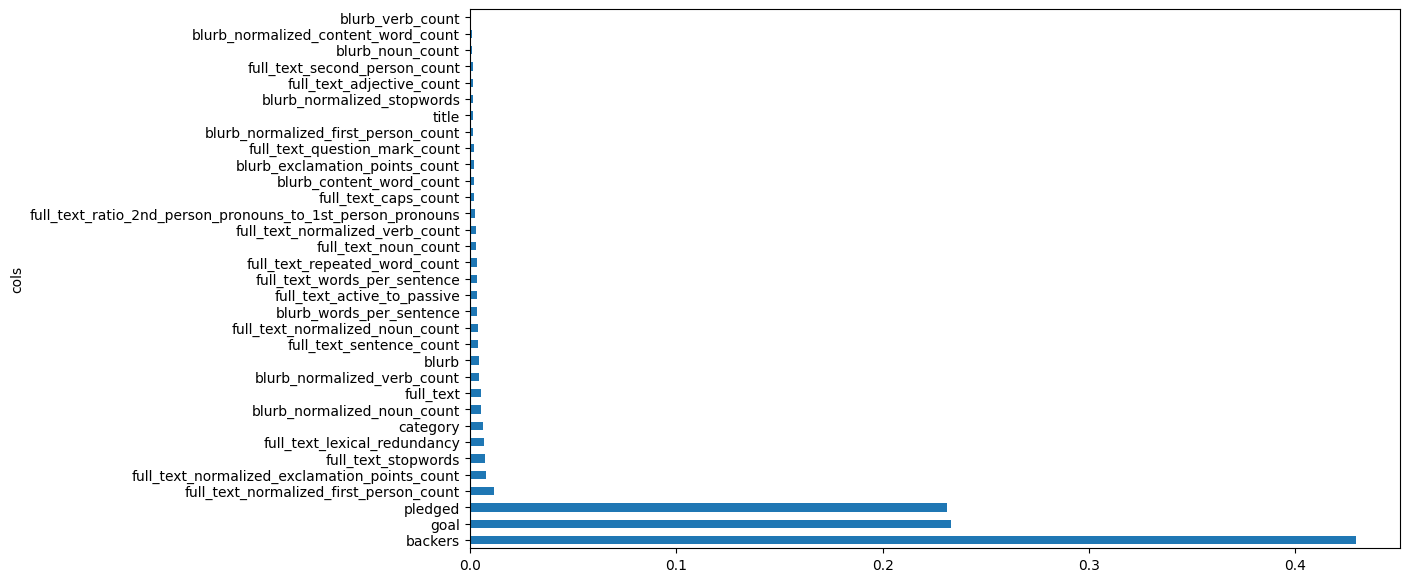

In [319]:
def plot_feat_importance(m, df):
    
    result_df = pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)    
    
    result = result_df[(result_df['imp']>0)]
    return result, result_df


result, result_df = plot_feat_importance(m, X_train_tab)
result.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

At this point, it's a good idea to remove any low importance variables. I'll arbitrarily set this cut-off to 0.005 and drop any features with importance below that threshold. Again, this is being done because 60+ features are too many to investigate. Additionally, keeping our goal in mind, 60+ features is also way too many things for a person trying to set themselves up for kickstarter success to keep track of, or take action on. 

The cluster columns function below create a plots that groups features with similar impact. It will also show features that are possible redundant. The function first, finds the pairwise correlation between between columns, using spearman rank. Then creates of hierarchy of the distances between pairs before creating a plot. We'll pass feature minimized training data in it's Fastai tabular form to the function to produce a visual that we can inspect.  

How to interpret output.... 

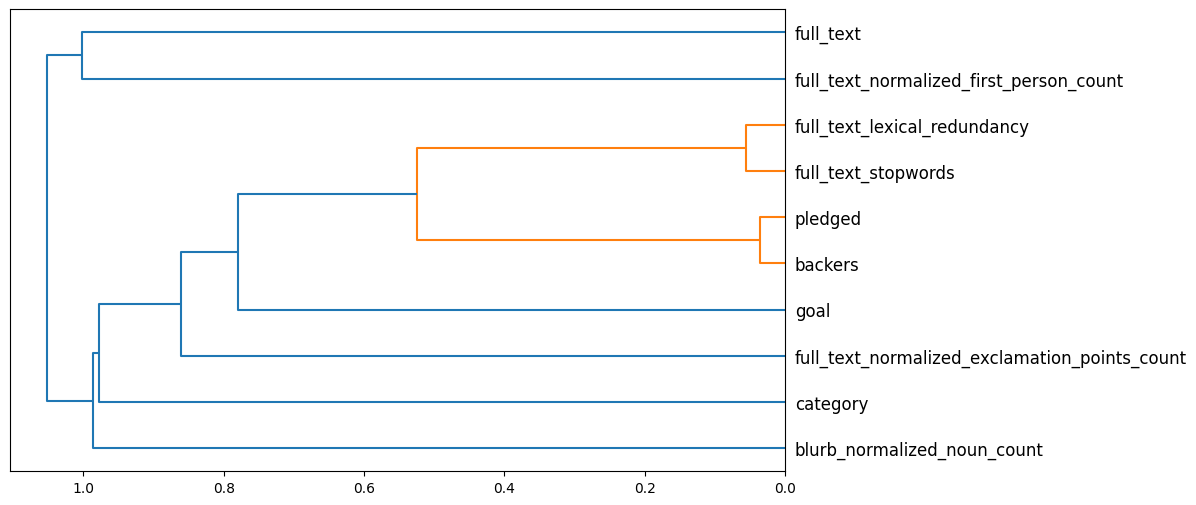

In [320]:
from scipy.cluster import hierarchy as hc

def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()


to_keep = result_df[result_df.imp>0.005].cols

X_train_tab_imp, X_valid_tab_imp =  X_train_tab[to_keep], X_valid_tab[to_keep]   
    
cluster_columns(X_train_tab_imp)

## Random Forest Classifier

In [321]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40, n_jobs=-1, random_state=1)
rfc.fit(X_train_tab, y_train_tab)

RandomForestClassifier(n_estimators=40, n_jobs=-1, random_state=1)

In [322]:
y_pred_valid_rfc = rfc.predict(X_valid_tab)
print(f'model accuracy score - validation set: {accuracy_score(y_valid_tab, y_pred_valid_rfc)}')

model accuracy score - validation set: 0.9093851132686084


In [323]:
#View classification report
print(classification_report(y_valid_tab, y_pred_valid_rfc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       225
           1       0.87      0.79      0.82        84

    accuracy                           0.91       309
   macro avg       0.90      0.87      0.88       309
weighted avg       0.91      0.91      0.91       309



In [324]:
confusion_matrix(y_valid_tab, y_pred_valid_rfc)

array([[215,  10],
       [ 18,  66]])

Across the board, the decission tree performed better than our randome forest classifier. 

<AxesSubplot:ylabel='cols'>

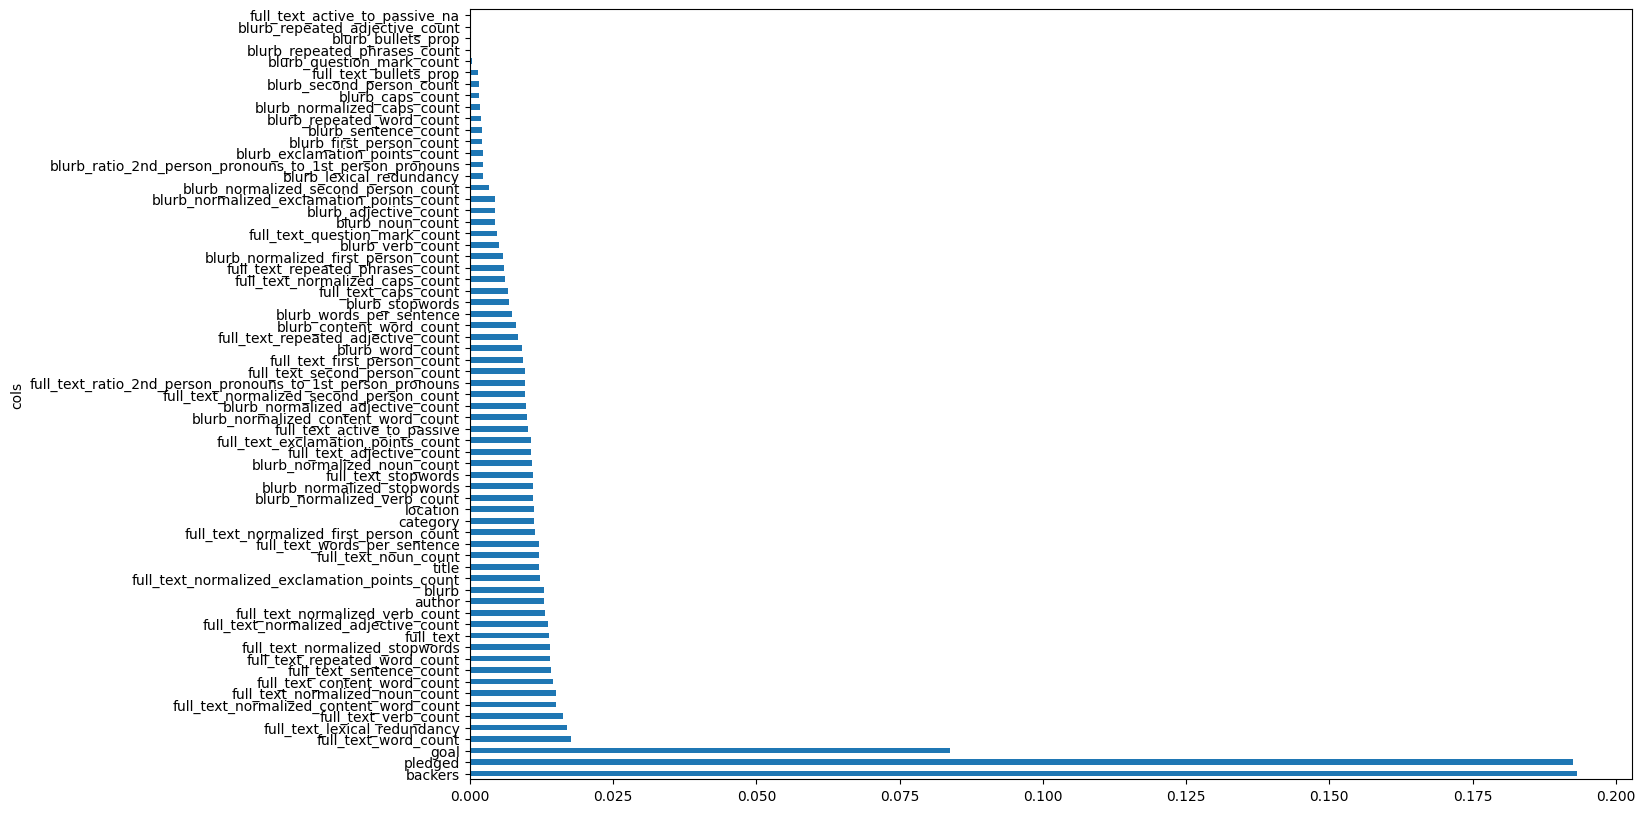

In [325]:
result_rfc, result_df_rfc = plot_feat_importance(rfc, X_train_tab)
result_rfc.plot('cols', 'imp', 'barh', figsize=(15,10), legend=False)

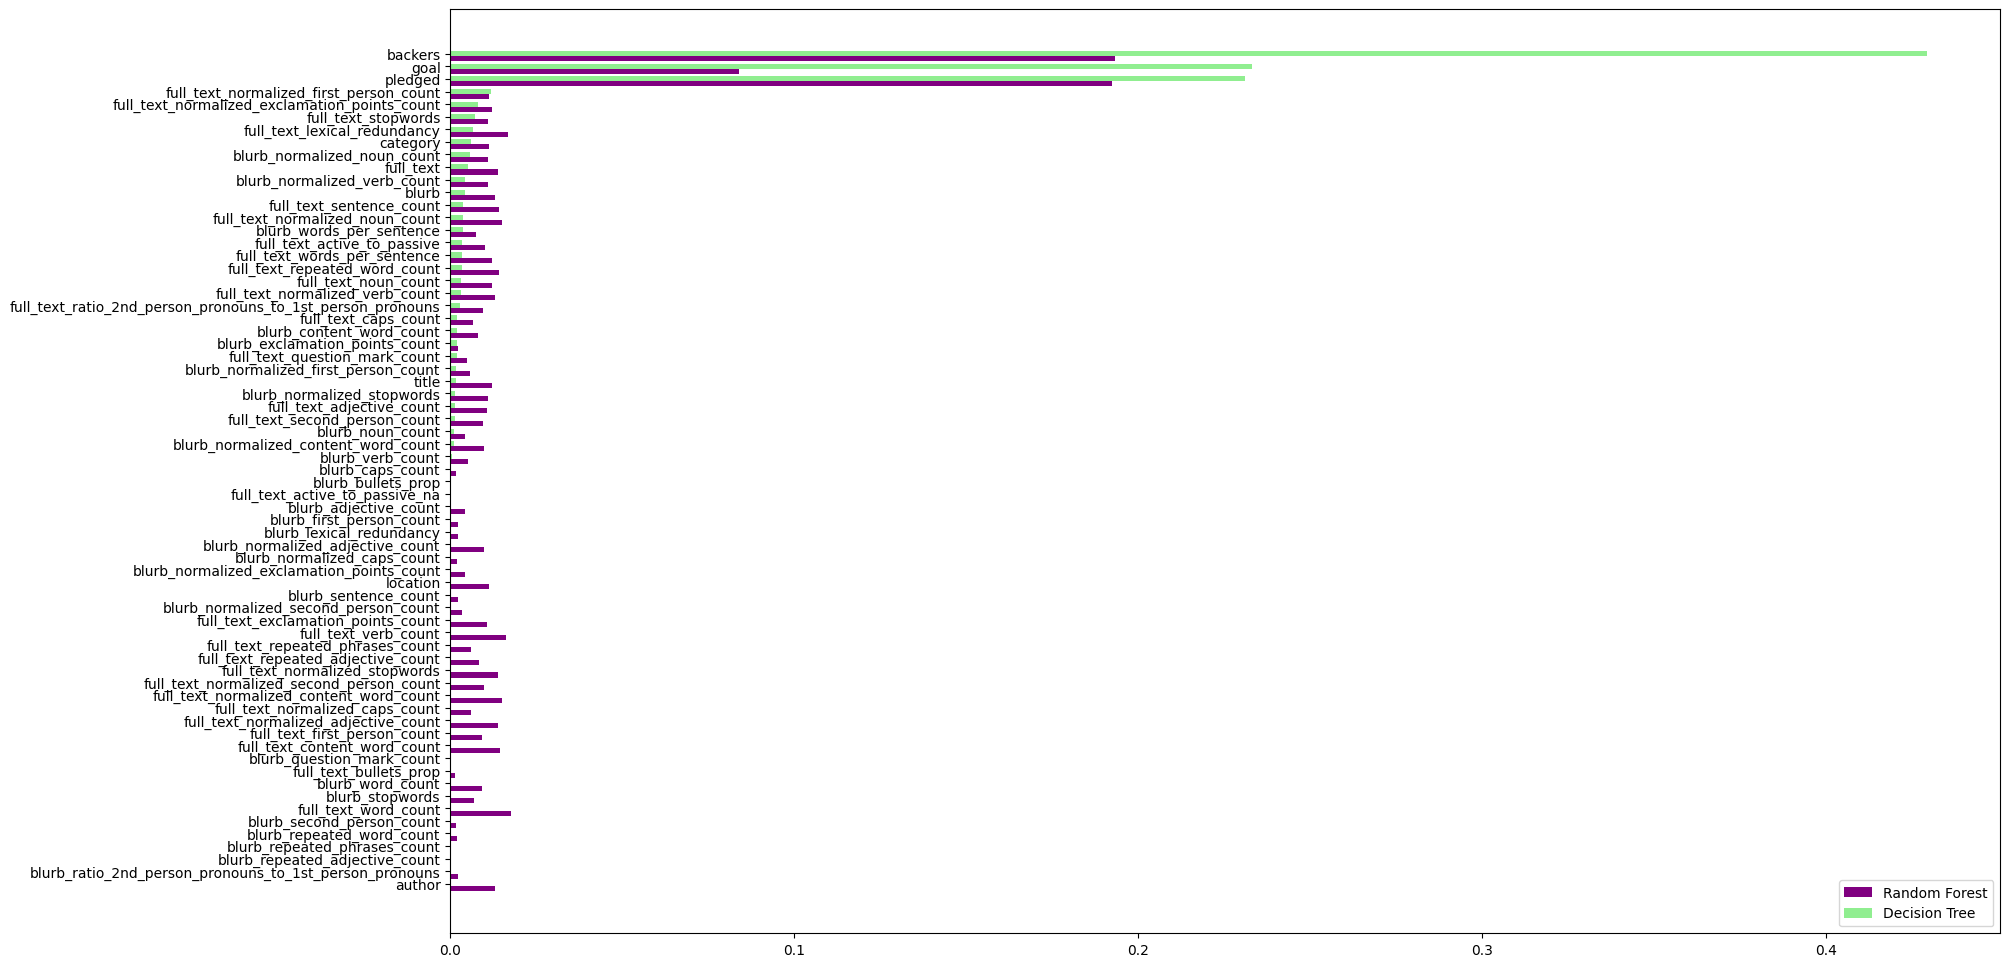

In [326]:
#Compare feature importance across models
feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dt':m.feature_importances_
},index=rfc.feature_names_in_)
feature_importance.sort_values(by='dt',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(20,12))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

The number of backers, the pledged amount, and the goal are still our most important features. However, outside of the top 3, our ranking change! I'll create a dataframe to store the feature importances from my random forest classifier, so that I can see if any features are redundant, and so that I can see if removing certain features improves my models. 

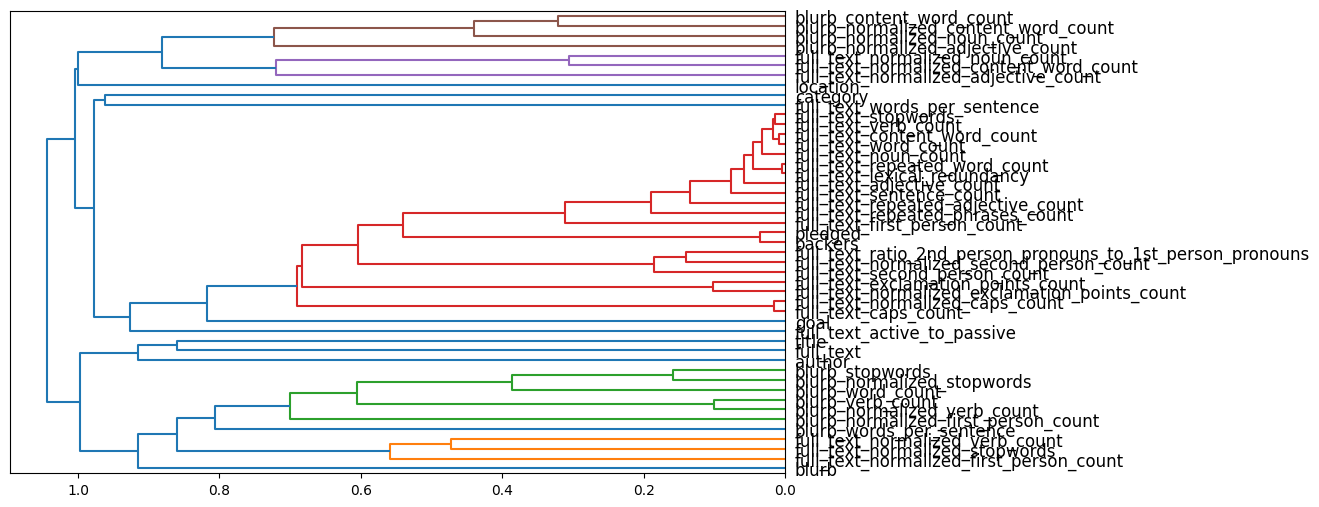

In [327]:
# result_df_rfc

to_keep = result_df_rfc[result_df_rfc.imp>0.005].cols

X_train_tab_imp_rfc, X_valid_tab_imp_rfc =  X_train_tab[to_keep], X_valid_tab[to_keep]   
    
cluster_columns(X_train_tab_imp_rfc)


Arbitrarily omitted features with importances below 0.005 still results in a somewhat large number of features to consider. We can use the OOB score (out-of-bag samples score), which returns a number between 1 and 0, where 1 is a perfect model to remove features one by one, to determine which features to keep. 

In [328]:
def get_oob(df, y):
    m = RandomForestClassifier(n_estimators=40, n_jobs=-1, oob_score=True, random_state=1)
    m.fit(df, y)
    return m.oob_score_

get_oob(X_train_tab, y_train_tab)

0.8874038072093965

A function that computes the impact of omitting each variable and suggests variables to retain is as follows. We'll use these suggestions to recompute our model accuracy to see if we can get an imprpved outcome with fewer features. 

In [329]:
#drop each feature in the minimized list one by one to see the score shift.
def make_suggestions(base_score, cutoff):
    suggestions = {}
    
    for c in X_train_tab_imp_rfc.columns:
        score = (get_oob(X_train_tab_imp_rfc.drop(c, axis=1), y_train_tab)- base_score)
        if abs(score) >= cutoff:
            suggestions[c] = score
    return suggestions
            
        
to_keep = make_suggestions(get_oob(X_train_tab, y_train_tab), .005)
to_keep

{'backers': -0.025516403402187082,
 'pledged': -0.03604698258404204,
 'goal': -0.052247873633049835,
 'full_text_word_count': 0.0052652895909275355,
 'full_text_verb_count': 0.008100445524503841,
 'full_text_repeated_word_count': -0.014580801944106936,
 'full_text_normalized_verb_count': 0.0068853786958282814,
 'author': 0.009720534629404698,
 'full_text_noun_count': 0.010125556905629884,
 'category': 0.0068853786958282814,
 'full_text_stopwords': 0.0052652895909275355,
 'blurb_normalized_noun_count': 0.006480356419603095,
 'full_text_normalized_second_person_count': 0.008910490076954214,
 'full_text_second_person_count': -0.0068853786958282814,
 'blurb_content_word_count': 0.005670311867152722}

From this you can see that removing backers, pledges, goal, and a host of other variables like `full_text_word_count` makes the model less predictive, and removing something like `blurb_noun_count` will produce a ~1% improvement. That established, I'm going to remove all of the features that have less than a 1% impact, and see see how the oob score changes. 

In [330]:
X_train_imp = X_train_tab[list(to_keep.keys())]
get_oob(X_train_imp, y_train_tab)

0.926285945727015

Removing all the columns expect those listed in `to_keep` boosted our training score to 93%. Now I will retrain a rfc model using only the most important features, and run our minimized validation set through the model to see if the performances has changed.

In [331]:
X_valid_imp = X_valid_tab[list(to_keep.keys())]

rfc_min = RandomForestClassifier(n_estimators=40, n_jobs=-1, oob_score=True, random_state=1)
rfc_min.fit(X_train_imp, y_train_tab)

y_pred_valid_rfc = rfc_min.predict(X_valid_imp)

#View classification report
print(classification_report(y_valid_tab, y_pred_valid_rfc))
print(f'RFC model accuracy score - validation set with min features: {accuracy_score(y_valid_tab, y_pred_valid_rfc)}')

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       225
           1       0.86      0.89      0.88        84

    accuracy                           0.93       309
   macro avg       0.91      0.92      0.92       309
weighted avg       0.93      0.93      0.93       309

RFC model accuracy score - validation set with min features: 0.9320388349514563


In [398]:
confusion_matrix(y_valid_tab, y_pred_valid_rfc)

array([[213,  12],
       [  9,  75]])

Our classifier is still a bit more accurate when it comes to campaigns that are not funded. Let's find some bad predictions and inspect them a bit more using a tree interpreter. 

In [500]:
def find_bad_preds_idx(x,y):
    return [i for i, (x, y) in enumerate(zip(y_valid_tab, y_pred_valid_rfc)) if x != y]

bad_pred = find_bad_preds_idx(y_valid_tab, y_pred_valid_rfc)

#concat feature df with target values dataframe for easy of interpretation
combo_df = pd.concat([X_valid_imp, y_valid_tab], axis=1)

#return df where predictions are incorrect, while showing target value
bad_preds_df = X_valid_imp.iloc[bad_pred]
bad_preds_df

backers       pledged   goal  full_text_word_count  \
1102        5    240.000000    200                   234   
393        17   4475.000000   3300                   531   
3083      153   4551.000000   5100                   631   
2231       36   2832.000000   2600                   204   
2302      173  12209.000000  18000                   826   
1885       34   2256.000000   2000                  1468   
1472       51   3795.000000   4000                  1263   
1616      199  11680.000000  13241                  2400   
1488     1237  34707.500000  95000                  1310   
311        98   2821.000000   4000                  1066   
1735       46    576.000000   1000                   824   
1433       10    542.000000    240                   187   
2344      287  11689.000000  12000                   842   
2703        8    406.000000    400                   292   
129        49   1976.000000   3500                   800   
1118       89   8092.000000  10600                   342   
988        36   1377.000000   2000                   695   
2028       21   1157.000000     49                   631   
2005       15    371.899994    240                   301   
2393      109  11615.000000  15000                   449   
2070       38   1267.000000   1200                    87   

      full_text_verb_count  full_text_repeated_word_count  \
1102                    37                             24   
393                     90                             83   
3083                    83                             84   
2231                    31                             14   
2302                   116                            153   
1885                   245                            267   
1472                   219                            162   
1616                   366                            640   
1488                   210                            235   
311                    155                            184   
1735                   118                            205   
1433                    38                             26   
2344                   131                            168   
2703                    55                             49   
129                    154                            126   
1118                    56                             48   
988                    104                            135   
2028                   122                            103   
2005                    47                             32   
2393                    63                             51   
2070                    17                              4   

      full_text_normalized_verb_count  author  full_text_noun_count  category  \
1102                         0.158120    1822                    31        13   
393                          0.169492     134                    88         5   
3083                         0.131537    2005                   134         9   
2231                         0.151961     374                    30        15   
2302                         0.140436     527                   128         8   
1885                         0.166894     608                   256        14   
1472                         0.173397     114                   230         7   
1616                         0.152500    2031                   288         9   
1488                         0.160305     325                   222         9   
311                          0.145403    2690                   199        11   
1735                         0.143204    2787                   106         9   
1433                         0.203209    2310                    23         3   
2344                         0.155582     925                   157        14   
2703                         0.188356     235                    46         4   
129                          0.192500    1172                   118         2   
1118                         0.163743    2155 

We'll then pass this dataframe to the tree interpreter (and verify the shape of each resturn). 

In [495]:
# !pip3 install treeinterpreter
# !pip3 install waterfallcharts

from treeinterpreter import treeinterpreter as ti
from waterfall_chart import plot as waterfall

prediction,bias,contributions = ti.predict(rfc_min, bad_preds_df) #use tree interpreter to make prediction
prediction.shape, bias.shape, contributions.shape

((21, 2), (21, 2), (21, 15, 2))

We have 21 rows of data, which can be classified two ways, resulting in a 21X2 array for both the prediction and bias return values. A marginal contribution value is returned for each of our 15 most important features, so we see an additional axis in our contributions object resulting in a 21x15x2 array. We'll grab contributions for our first class and first inaccurate prediction, and use that to visualize the marginal contribution of each feature seen by our model.  

backers                                       17.000000
pledged                                     4475.000000
goal                                        3300.000000
full_text_word_count                         531.000000
full_text_verb_count                          90.000000
full_text_repeated_word_count                 83.000000
full_text_normalized_verb_count                0.169492
author                                       134.000000
full_text_noun_count                          88.000000
category                                       5.000000
full_text_stopwords                          221.000000
blurb_normalized_noun_count                    0.318182
full_text_normalized_second_person_count       0.011299
full_text_second_person_count                  6.000000
blurb_content_word_count                      14.000000
funded                                         1.000000
Name: 393, dtype: float64

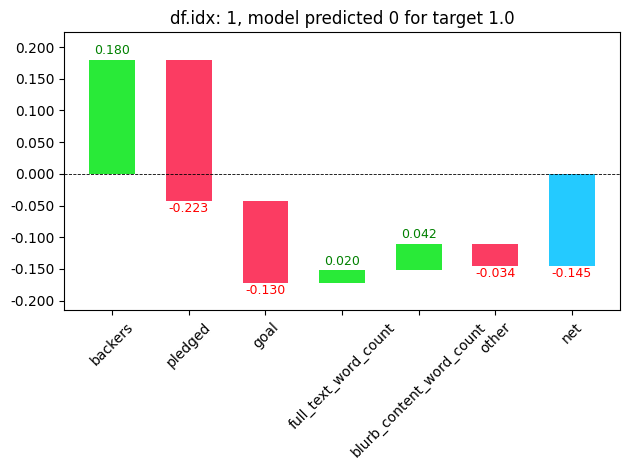

In [544]:
row = 1

def create_summary(row):
    pred = np.argmax(prediction[row])
    actual = combo_df.iloc[bad_pred].iloc[row].tail(1).item()
    summary = f'df.idx: {row}, model predicted {pred} for target {actual}'
    return summary

contribs = [item[0] for item in contributions[row]]
waterfall(X_valid_imp.columns, contribs, threshold=0.08, Title= create_summary(row),
          rotation_value=45,formatting='{:,.3f}');

combo_df.iloc[bad_pred].iloc[row]

## Finding out of domain data

Next we'll take a minute to verify that our validation and training data contain the same distributions of data. To do this, we'll: 
- combine our train and validation  data sets, 
- define a new dependent variable dataset where 0 signifies a data points belongs to the validation set, and 1 signifies a data point belongs to the training set. 
- train a new model with our new X and y values 
- review feature importances to see if they differ from our main model 

Using this approach, we can see if their are columns that significantly different in the validation set. 


In [547]:
df_dom = pd.concat([X_train_imp, X_valid_imp])
is_valid = np.array([0]*len(X_train_imp) + [1]*len(X_valid_imp))

rfc_domain = RandomForestClassifier(n_estimators=40, n_jobs=-1, random_state=1)
m_domain = rfc_domain.fit(df_dom, is_valid)

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)


rf_feat_importance(m_domain, df_dom)

#TODO: Read chapter 9

cols       imp
7                                     author  0.090217
6            full_text_normalized_verb_count  0.086931
2                                       goal  0.078156
3                       full_text_word_count  0.071870
5              full_text_repeated_word_count  0.071003
12  full_text_normalized_second_person_count  0.070775
10                       full_text_stopwords  0.070624
8                       full_text_noun_count  0.066974
4                       full_text_verb_count  0.066121
11               blurb_normalized_noun_count  0.064703
1                                    pledged  0.061914
0                                    backers  0.058924
9                                   category  0.054491
14                  blurb_content_word_count  0.047028
13             full_text_second_person_count  0.040268

## Doing all of this using a Neural Network

Because we are working with matrixes and matrix multiplication, we should consider removing very high cardinality features after testing their impact on the model. Considering this dataset and our goal of providing advice to campaign creators about how to improve their chances of getting funding, I'll remove the `author` feature sinces its simply the name of the campaign creator. I want to avoid having +3k columns in the matrix! `full_text_word_count` is something a creator CAN control, so I'll be leaving this feature since it was already deemed important. This change results in a slight improvement over our standing `oob` of 0.926.

In [684]:
X_train_imp_lc = X_train_imp.drop('author', axis=1)
get_oob(X_train_imp_lc, y_train_tab)

0.9295261239368166

I need to create a new tabular pandas object containing only my important columns, but using the same processing steps as before. Recall: 

-- 
dep_var = 'funded'
processors = [Categorify, FillMissing]
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
 
#Split the data
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = dep_var, 
                                                                            train_size=0.8, valid_size=0.1,
test_size=0.1)

splits = (X_train.index.tolist(),X_valid.index.tolist())

--

To do this, I'll need to create a dataframe containing all rows of data, my important features and my target values. My orginal work to define categorical and continous data can't be used because I have minimized which features are included in my dataset. So I'll need to recreate those as well. I'll keep my train/validate/test split the same. I'll also normalize my `cont_nn` features since we're training a neural net, so the existing `processors` also need to be updated. 

#todo: deal with the fact that some columns are normalized and some are not.

In [691]:
df_nn =  df[list(X_train_imp_lc.columns) + [dep_var]]
cont_nn,cat_nn = cont_cat_split(df_nn, 1, dep_var=dep_var)
processors_nn = [Categorify, FillMissing]


tab_nn = TabularPandas(df_nn, 
                       processors_nn, 
                       cat_nn, 
                       cont_nn,
                       y_names=dep_var,
                       splits=splits)

In [692]:
#update the batch size
dls = tab_nn.dataloaders(1024)

In [693]:
len(to_nn.train),len(to_nn.valid)

(2470, 617)

In [694]:
#Create the learner
learn = tabular_learner(dls, layers=[500,250], metrics=accuracy)


SuggestedLRs(valley=0.0002290867705596611)

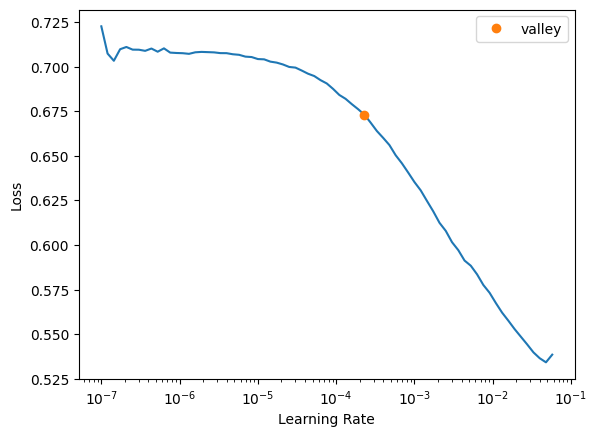

In [695]:
learn.lr_find()

In [696]:
learn.fit_one_cycle(27, 1e-4)

Now that a new learner has been trained, we'll see how it preforms on our validation data. The `X_valid` data will need to be processed the same way that our training data was processed. `DataLoaders` has a `test_dl` method that helps with this. 

In [736]:
X_valid_imp = X_valid[list(X_train_imp_lc.columns)]
X_valid_imp_proc = tab_nn.dataloaders().test_dl(X_valid_imp)
# X_valid_imp_proc.items.head(4)


Now I can run inference on my validation set, and create some summaries of the resulting predictions. To do this, I'll also need to map my target values for the validation set to 0 or 1.  

In [737]:
preds = learn.get_preds(dl=X_valid_imp_proc)
y_predict = np.argmax(preds[0], axis=1).numpy()
y_test = y_valid.map({True: 1, False: 0})

In [741]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       229
           1       0.66      0.71      0.68        80

    accuracy                           0.83       309
   macro avg       0.78      0.79      0.78       309
weighted avg       0.83      0.83      0.83       309



In [ ]:
#Up next --> embeddings: https://www.kaggle.com/code/ruthgn/binary-classifier-fastai-nn-embeddings/notebook